# GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP) 

## THE SPARKS FOUNDATION

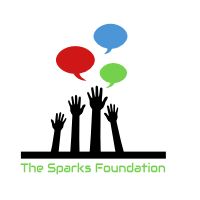

<h3><b> Author: </b> Sai Vineeth Grandhi</h3>

## Task - 2: Prediction Using Unsupervised ML

### Problem Statement

- From the given dataset predict the number of optimum number of clusters

#### 1. Library Handling

- Let's start importing the required libraries which is required for model building!!

In [1]:
# importing warnings to filter the warning messages
import warnings
warnings.filterwarnings('ignore')

# importing numpy to deal with the mathematical operations on Arrays 
# importing pandas to deal with the data present in the form of DataFrames
import numpy as np
import pandas as pd 

# importing plotly for the data visualizations
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# importing scikit-learn useful for model-building
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# importing scipy.cluster.hiererarchy modules required for clustering 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### 2. Loading & Analysing Data

- Let's load the data into the dataframe and analyze the data

#### 2.1. Loading Data

In [2]:
# loading the data into the dataframe ('df')

df= pd.read_csv('Iris.csv')
print('Data is ready for model Building !!')

Data is ready for model Building !!


#### 2.2. Inspecting DataFrame

In [3]:
# checking the head

df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
# checking the shape of df 

print('Number of rows in df: '+ str(df.shape[0]), end= '\n\n\n')
print('Number of columns in df: '+ str(df.shape[1]))

Number of rows in df: 150


Number of columns in df: 6


In [5]:
# checking the information of columns present in the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# describing the columns present in the df 

df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

#### 3. Data Cleaning 

In [7]:
# let's check the missing values in the data set 

df.isnull().sum()/len(df) * 100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [8]:
# let's drop Id column as we cannot derive any insights 

df.drop(columns= ['Id'], inplace= True)

In [9]:
# let's again check the head values 

df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

#### 4. Data Visualisation

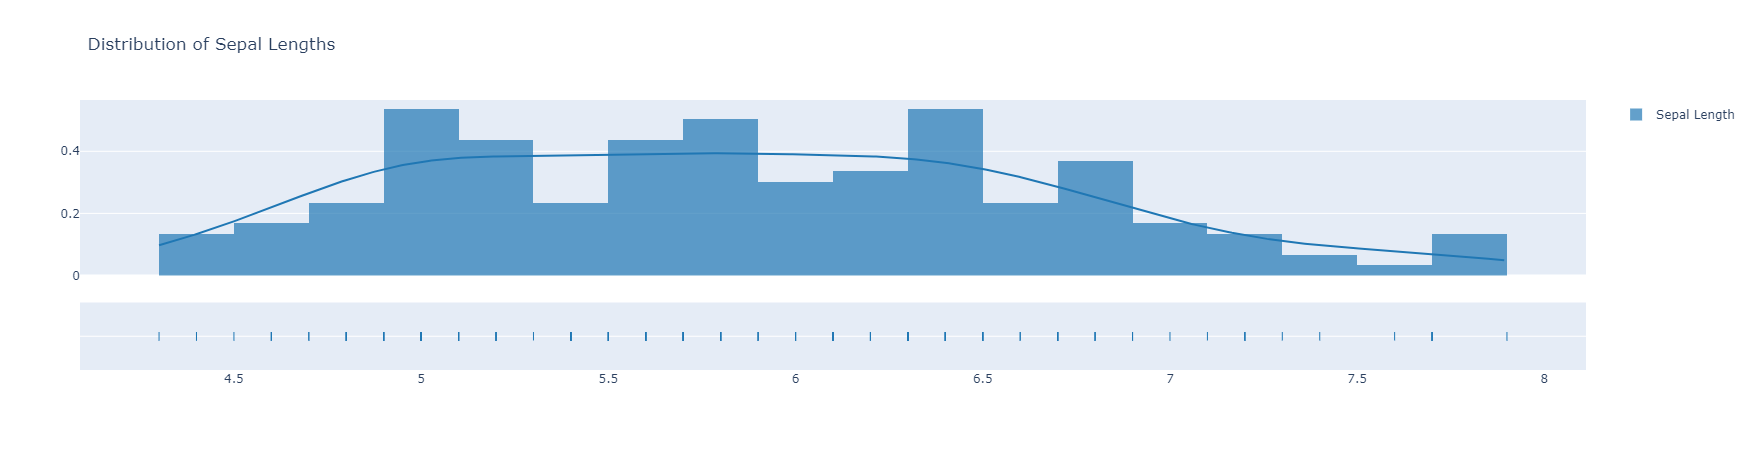

In [10]:
# let's check the distribution of Sepal Length 

fig= ff.create_distplot([df['SepalLengthCm']], ['Sepal Length'], bin_size= .2)
fig.update_layout(title_text= 'Distribution of Sepal Lengths')
fig.show()

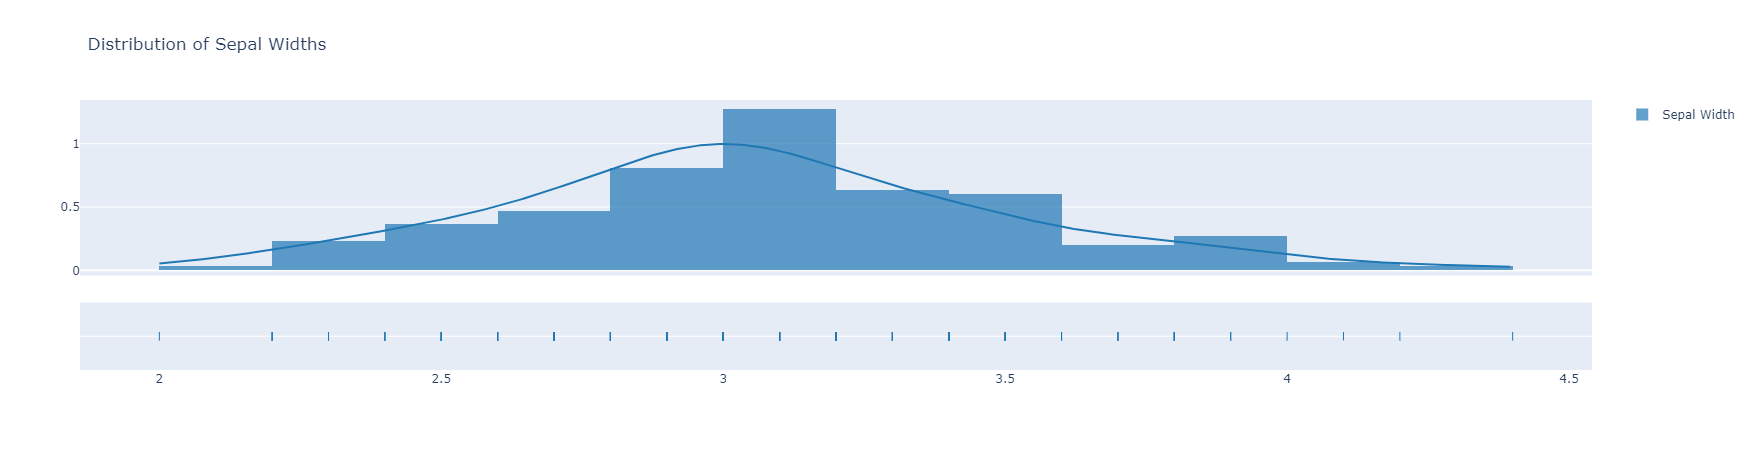

In [11]:
# let's check the distribution of Sepal Width 

fig= ff.create_distplot([df['SepalWidthCm']], ['Sepal Width'], bin_size= .2)
fig.update_layout(title_text= 'Distribution of Sepal Widths')
fig.show()

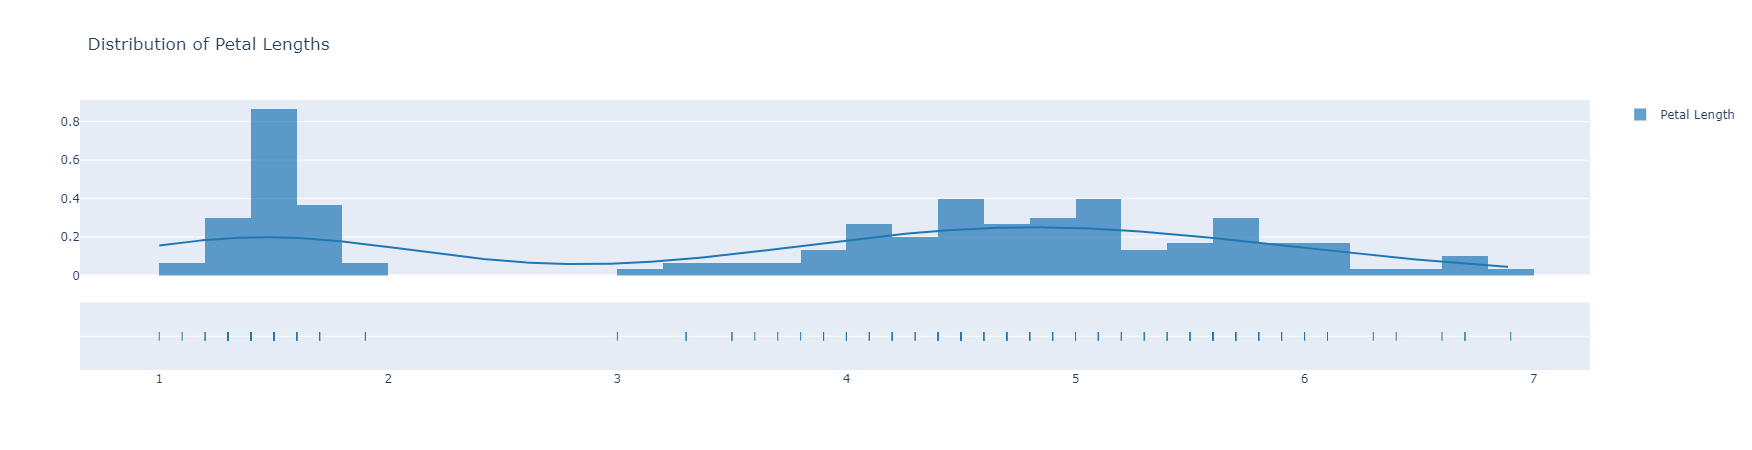

In [12]:
# let's check the distribution of Petal Length 

fig= ff.create_distplot([df['PetalLengthCm']], ['Petal Length'], bin_size= .2)
fig.update_layout(title_text= 'Distribution of Petal Lengths')
fig.show()

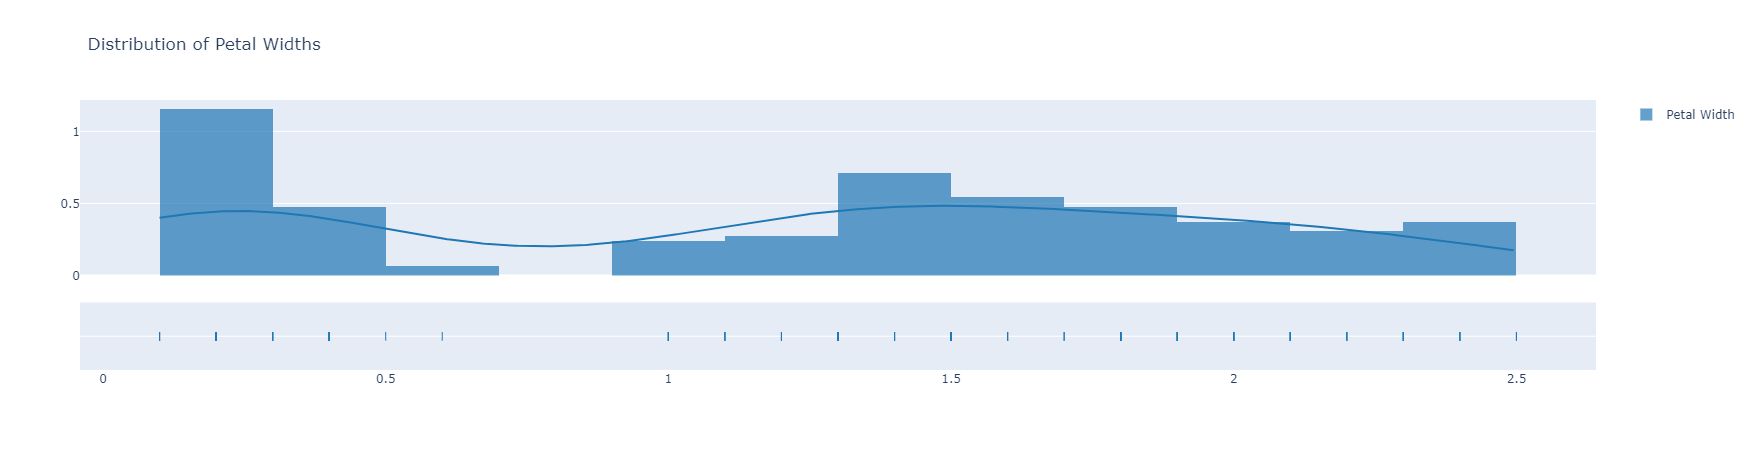

In [13]:
# let's check the distribution of Petal Width 

fig= ff.create_distplot([df['PetalWidthCm']], ['Petal Width'],  bin_size= .2)
fig.update_layout(title_text= 'Distribution of Petal Widths')
fig.show()

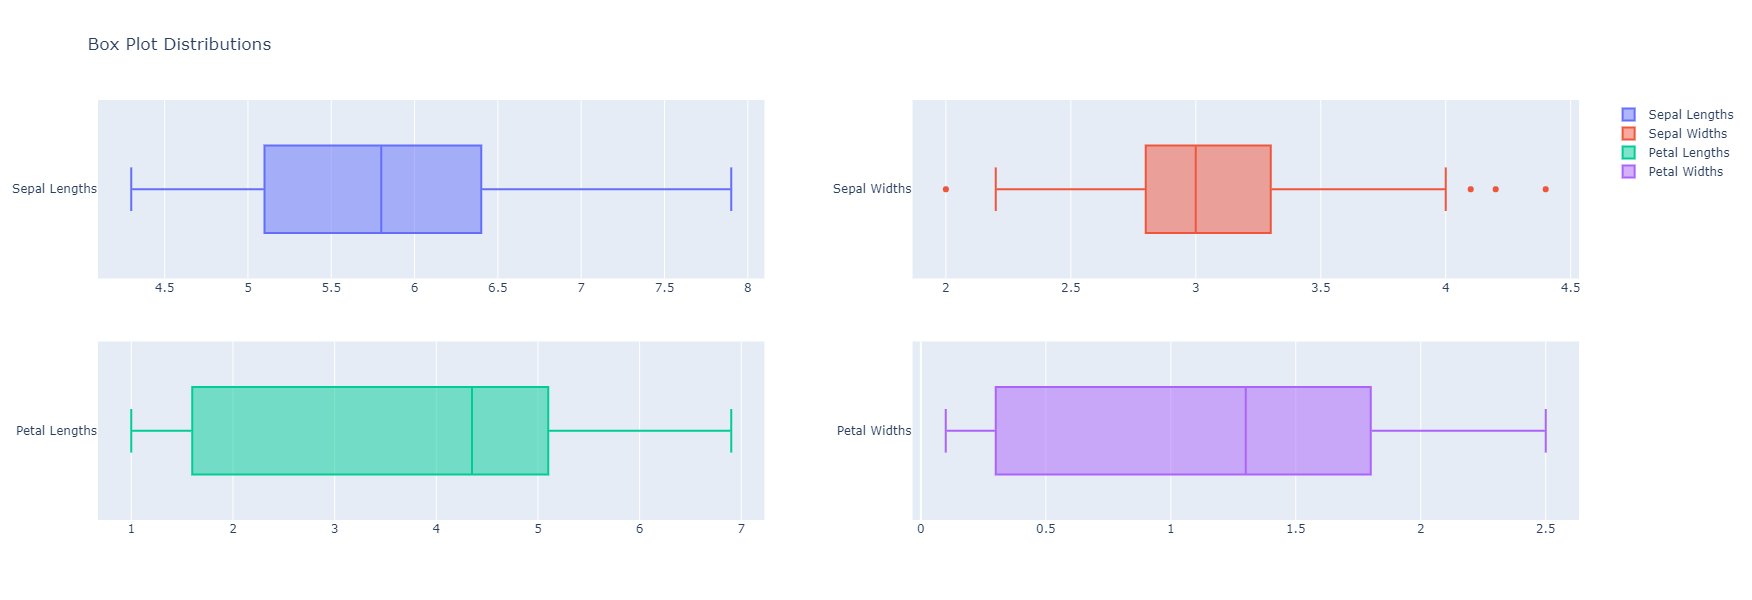

In [14]:
# let's have a look of boxplots of all the features 

fig = make_subplots(rows= 2, cols= 2)
fig.add_trace(go.Box(x= df['SepalLengthCm'], name= 'Sepal Lengths'), row= 1, col= 1)
fig.add_trace(go.Box(x= df['SepalWidthCm'], name= 'Sepal Widths'), row= 1, col= 2)
fig.add_trace(go.Box(x= df['PetalLengthCm'], name= 'Petal Lengths'), row= 2, col= 1)
fig.add_trace(go.Box(x= df['PetalWidthCm'], name= 'Petal Widths'), row= 2, col= 2)
fig.update_layout(title_text= 'Box Plot Distributions', height= 600)
fig.show()

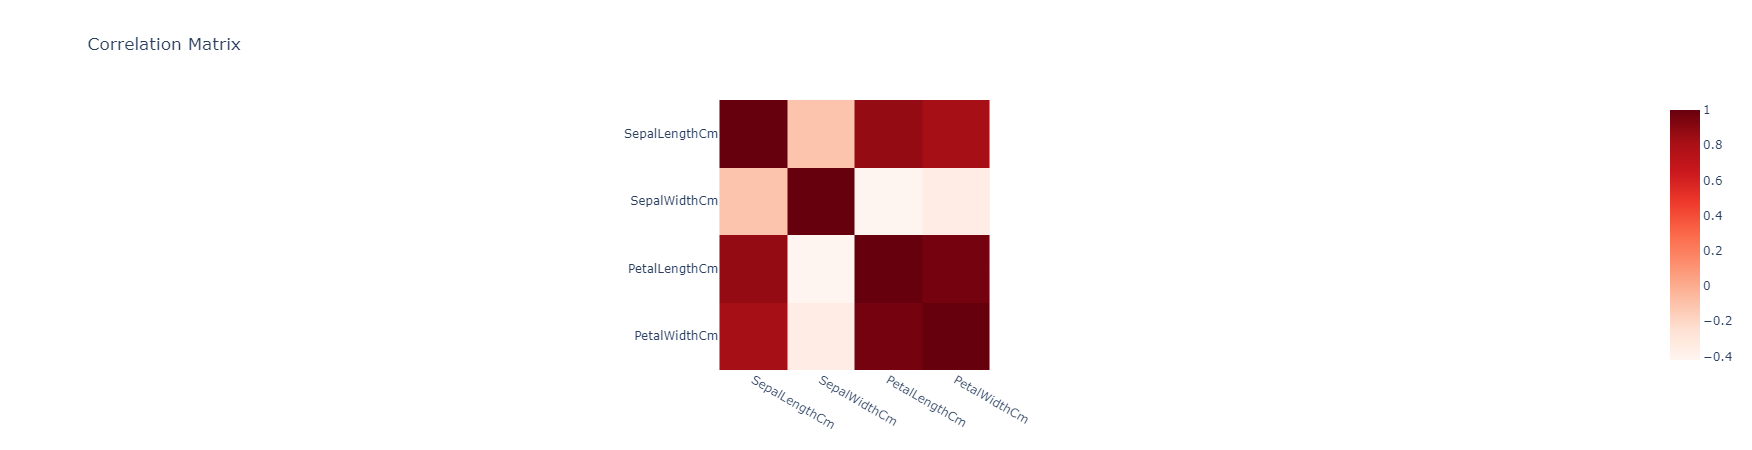

In [15]:
# let's plot the correlations matrix 

fig= px.imshow(df.corr(), title='Correlation Matrix', color_continuous_scale= 'Reds')
fig.show()

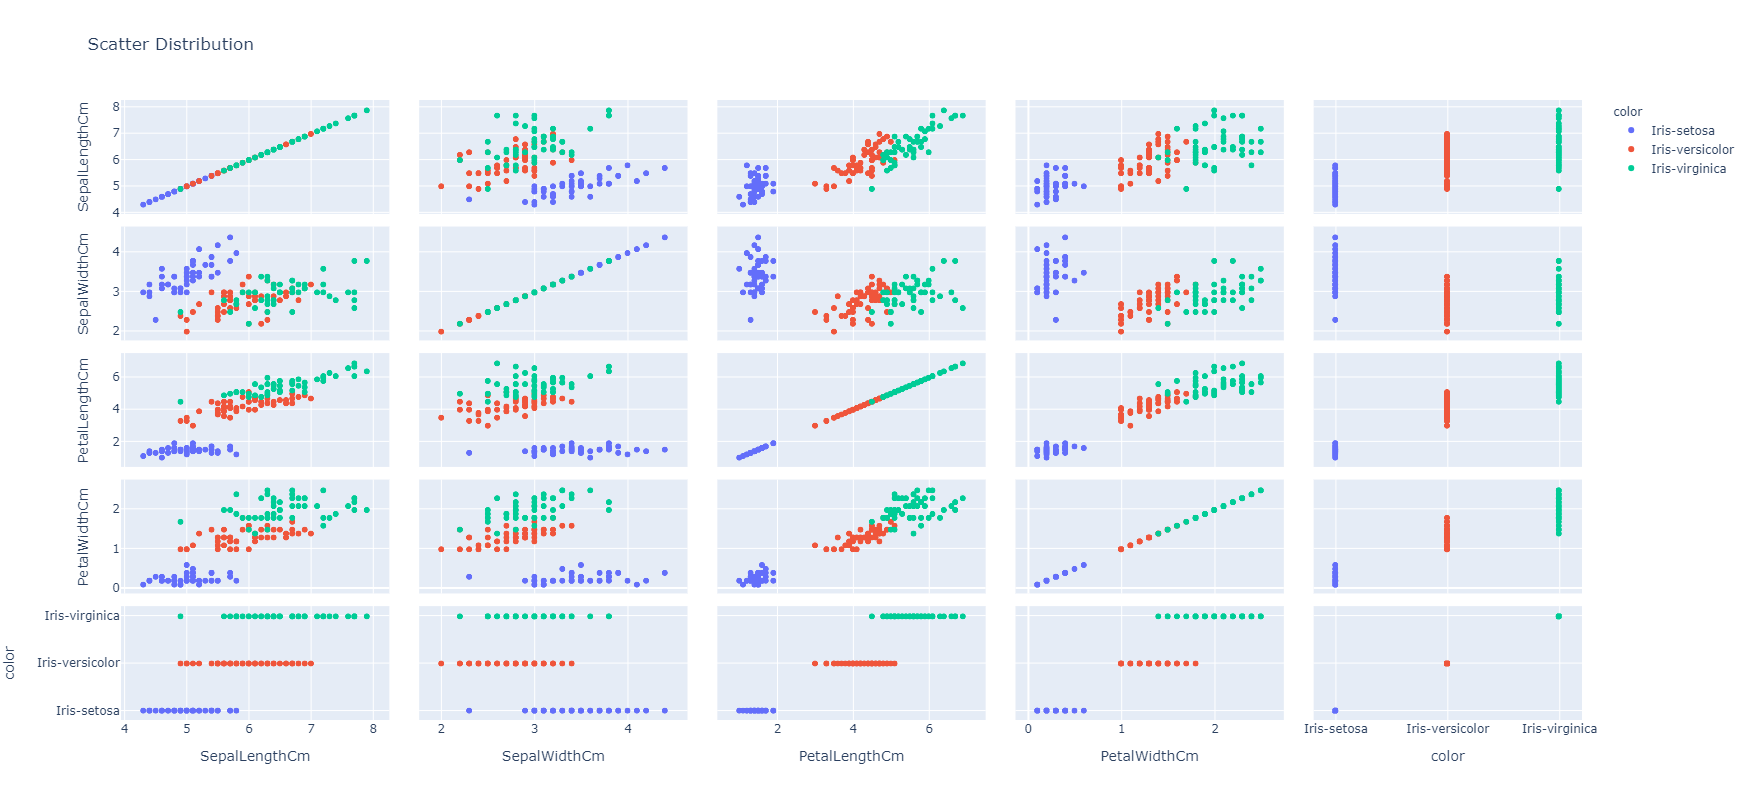

In [16]:
# let's plot the scatter matrix for all the features 

fig= px.scatter_matrix(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], color= df['Species'], title= 'Scatter Distribution')
fig.update_layout(height= 800)
fig.show()

#### 5. Preparing the Data For Model Building 

- For the Model Building, we need to follow these steps: 
    - Dropping Species Column 
    - Standardizing the column values 

In [17]:
# let's create another dataframe by dropping species 

df_drop= df.drop(columns= ['Species'])
df_drop.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [18]:
# standardizing the data using StandardScaler 

# intantiating scaler 
scaler= StandardScaler()

# fit_transform 
df_scaled= scaler.fit_transform(df_drop)

In [19]:
# let's check the scaled df 

df_scaled.shape

(150, 4)

In [20]:
# let's convert it into dataframe 

df_scaled= pd.DataFrame(df_scaled)
df_scaled.columns= df_drop.columns 
df_scaled.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977

In [21]:
# let's describe the df_scaled 

df_scaled.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02
mean   -2.775558e-16 -5.140333e-16   1.154632e-16  9.251859e-16
std     1.003350e+00  1.003350e+00   1.003350e+00  1.003350e+00
min    -1.870024e+00 -2.438987e+00  -1.568735e+00 -1.444450e+00
25%    -9.006812e-01 -5.877635e-01  -1.227541e+00 -1.181504e+00
50%    -5.250608e-02 -1.249576e-01   3.362659e-01  1.332259e-01
75%     6.745011e-01  5.692513e-01   7.627586e-01  7.905908e-01
max     2.492019e+00  3.114684e+00   1.786341e+00  1.710902e+00

- Since we have used the Standardized Scaler, all the values have been scaled in such a way that the mean is 0 and standard deviation is 1. 

Formula for the standard scaling is giving by: 

$$\text{scaling} = \frac{(x-mean)}{(standard deviation)}$$

#### 6. Model Building 

- Here we are using two types of clustering techniques: 
    - K Means Clustering 
    - Hierarical Clustering 

#### 6.1. K Means Clustering 

- The process of K Means clustering is elobrated in simple steps as follows: 
    - We need to find the optimal number of clusters. For this we will be using: 
        - Elbow Curve Method 
        - Silhoutte Analysis
    - After find the Optimal Number of clusters, we will be fitting the data into K Means model 

#### Finding the Optiamal Number of Clusters 

#### Elbow Curve Method 

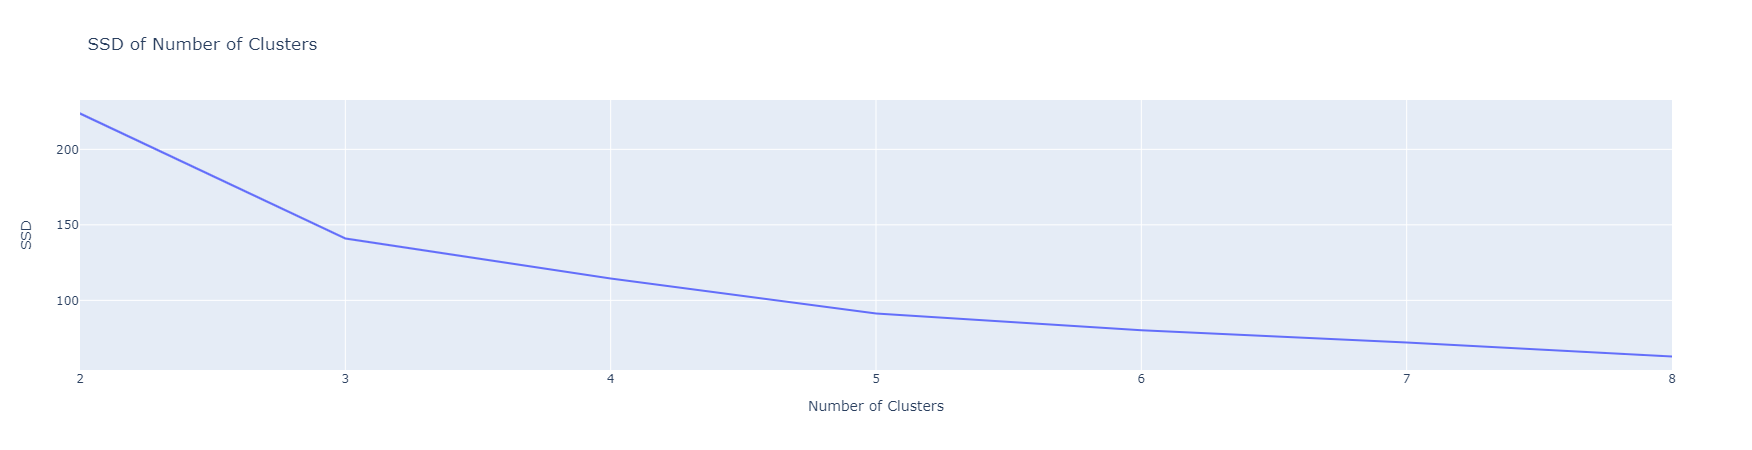

In [22]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
fig= px.line(x= range_n_clusters, y= ssd, labels={'x':'Number of Clusters', 'y':'SSD'}, title= 'SSD of Number of Clusters')
fig.show()

#### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [23]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For clusters= {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For clusters= 2, the silhouette score is 0.580184463257396
For clusters= 3, the silhouette score is 0.4589717867018717
For clusters= 4, the silhouette score is 0.38724679456128813
For clusters= 5, the silhouette score is 0.3516422319268987
For clusters= 6, the silhouette score is 0.32800245312290494
For clusters= 7, the silhouette score is 0.32883162164047375
For clusters= 8, the silhouette score is 0.33295263932252167


<font color = 'Orange'><h2> Inferences: </h2></font> 

- From the above SSD & Silhouette analysis: 
    - We can select the optimal number of clusters as 3

#### Model Building using the K-Means Clustering 

In [24]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state= 0)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [25]:
# checking the labels formed 

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [26]:
# assigning the labels to original df 

df['Label_K']= kmeans.labels_ 
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Label_K  
0        1  
1        1  
2        1  
3        1  
4        1

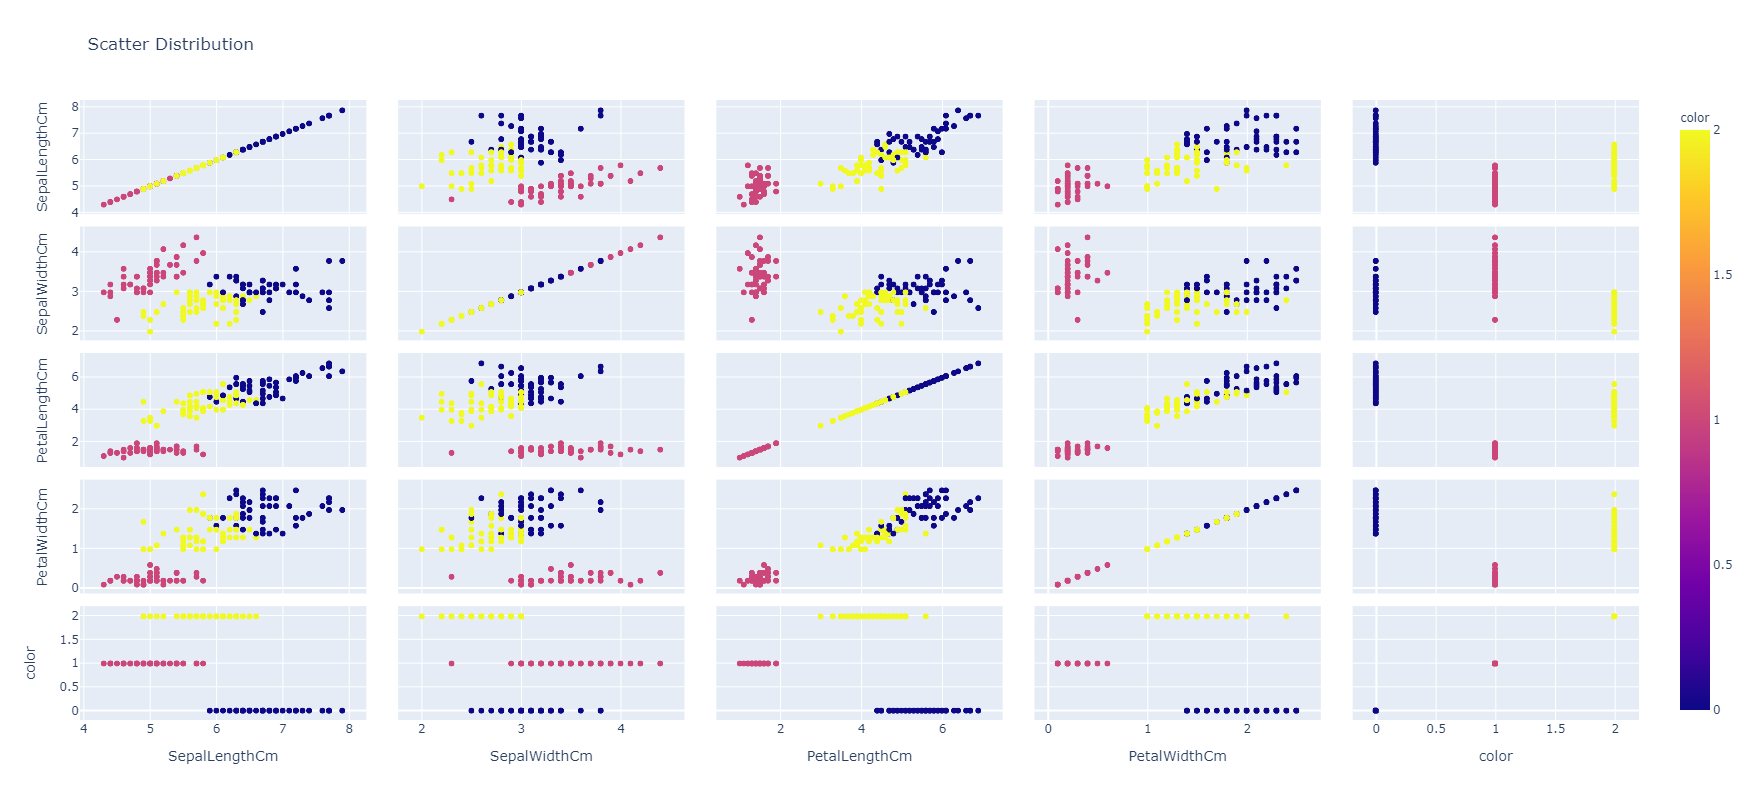

In [27]:
# let's visualize the data 

fig= px.scatter_matrix(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], color= df['Label_K'], title= 'Scatter Distribution')
fig.update_layout(height= 800)
fig.show()

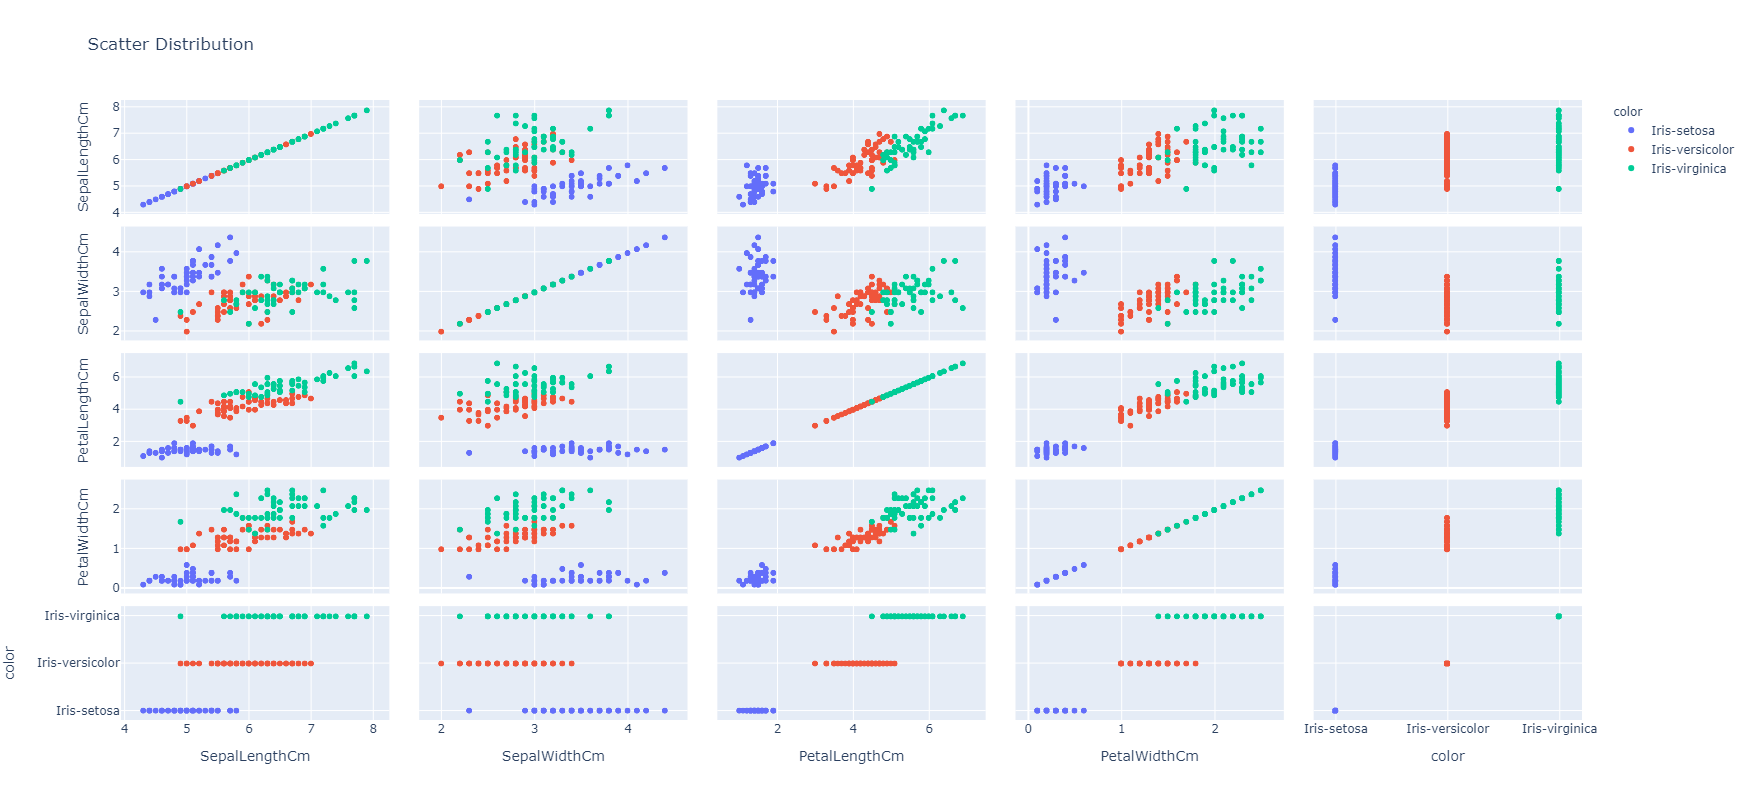

In [28]:
# let's plot the scatter matrix for all the features (Original)

fig= px.scatter_matrix(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], color= df['Species'], title= 'Scatter Distribution')
fig.update_layout(height= 800)
fig.show()

<font color = 'Orange'><h2> Inferences: </h2></font> 

- Looks like the optimal cluster 3 is having almost the same visualizations as original. 

#### 6.2. Hierarical Clustering

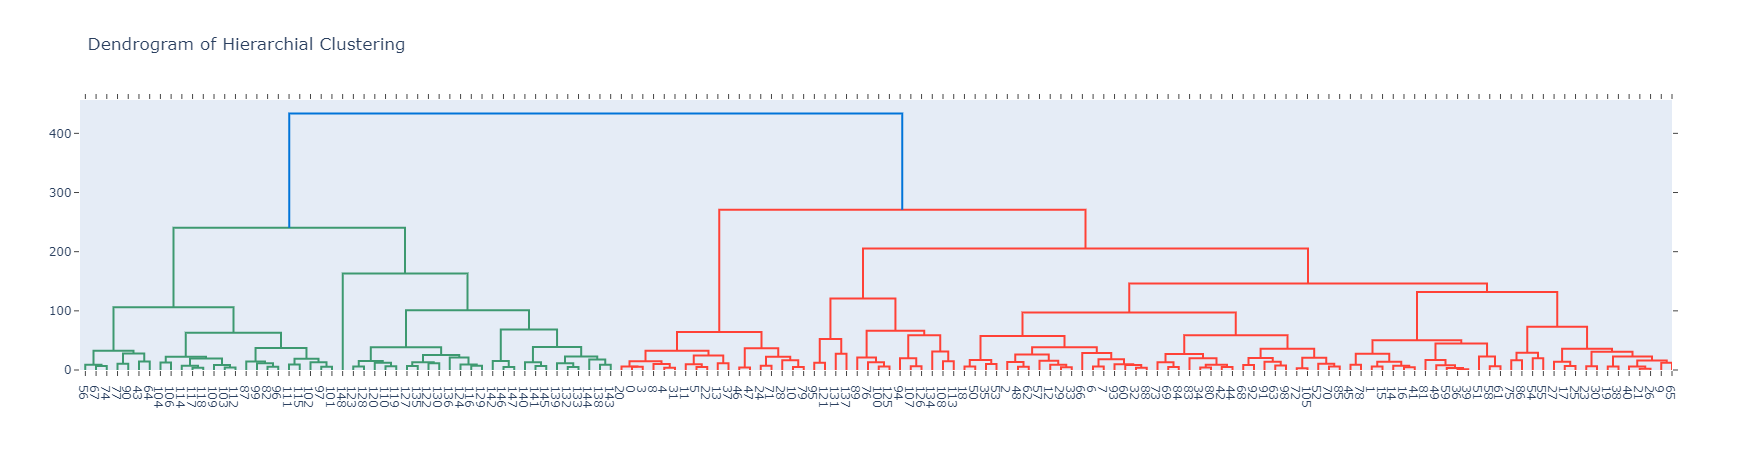

In [29]:
# model building using hierarcial clustering and plotting dendrogram

mergings = linkage(df_scaled, method="complete", metric='euclidean')
fig= ff.create_dendrogram(mergings)
fig.update_layout(title_text='Dendrogram of Hierarchial Clustering', width= 1500)
fig.show()

In [30]:
# cluster labels by choosing 3 optimal clusters from the dendrogram

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
# assigning the labels to original df 

df['Label_Hierachial']= cluster_labels 
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Label_K  Label_Hierachial  
0        1                 0  
1        1                 0  
2        1                 0  
3        1                 0  
4        1                 0

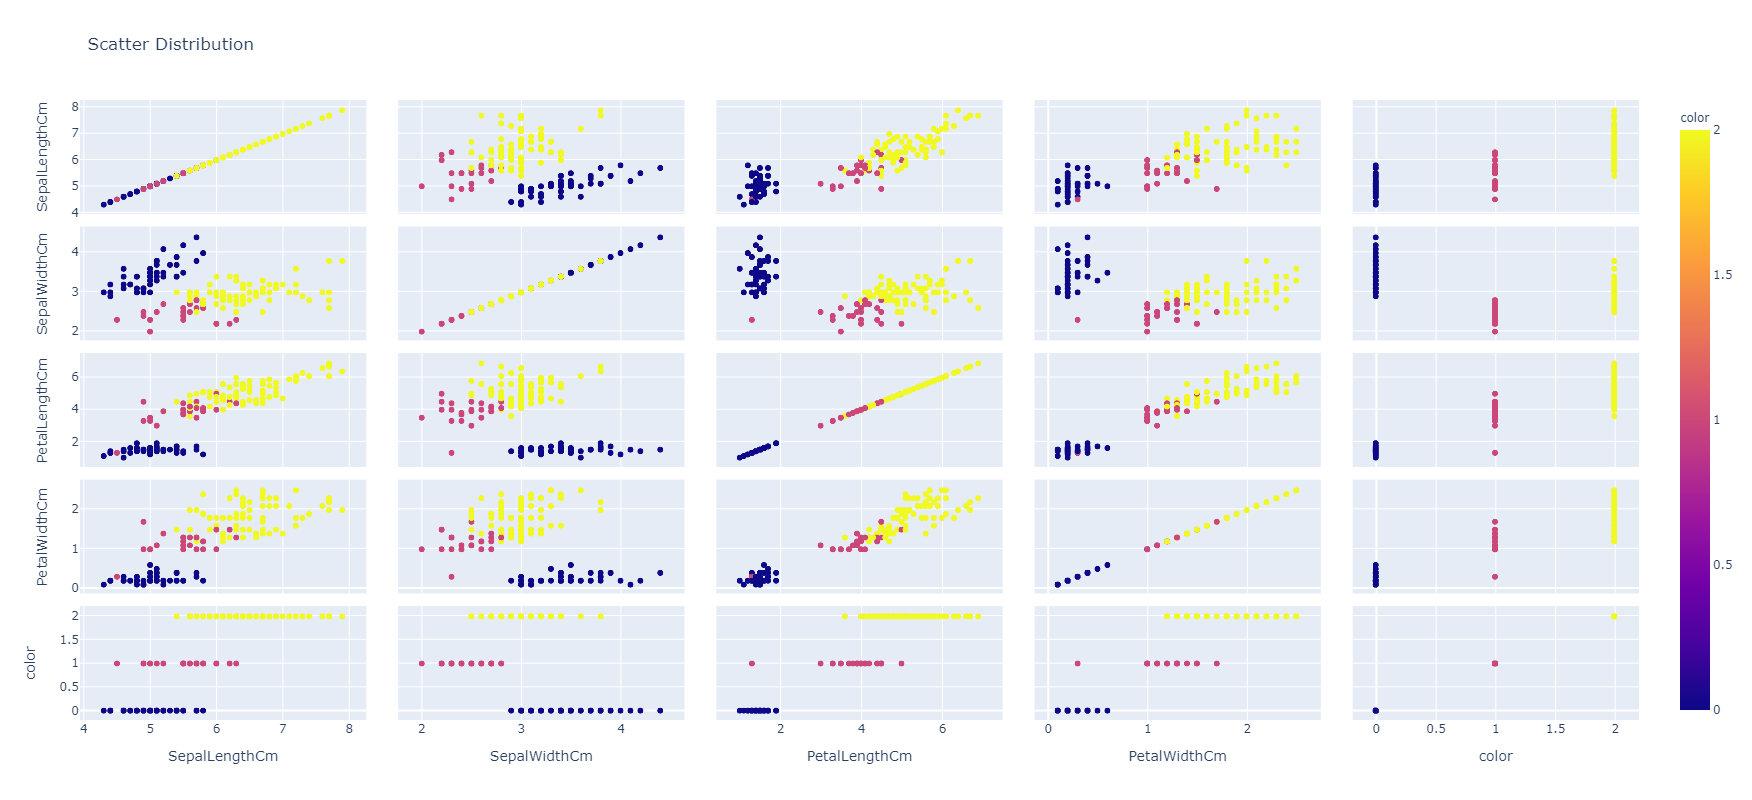

In [32]:
# let's visualize the data 

fig= px.scatter_matrix(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], color= df['Label_Hierachial'], title= 'Scatter Distribution')
fig.update_layout(height= 800)
fig.show()

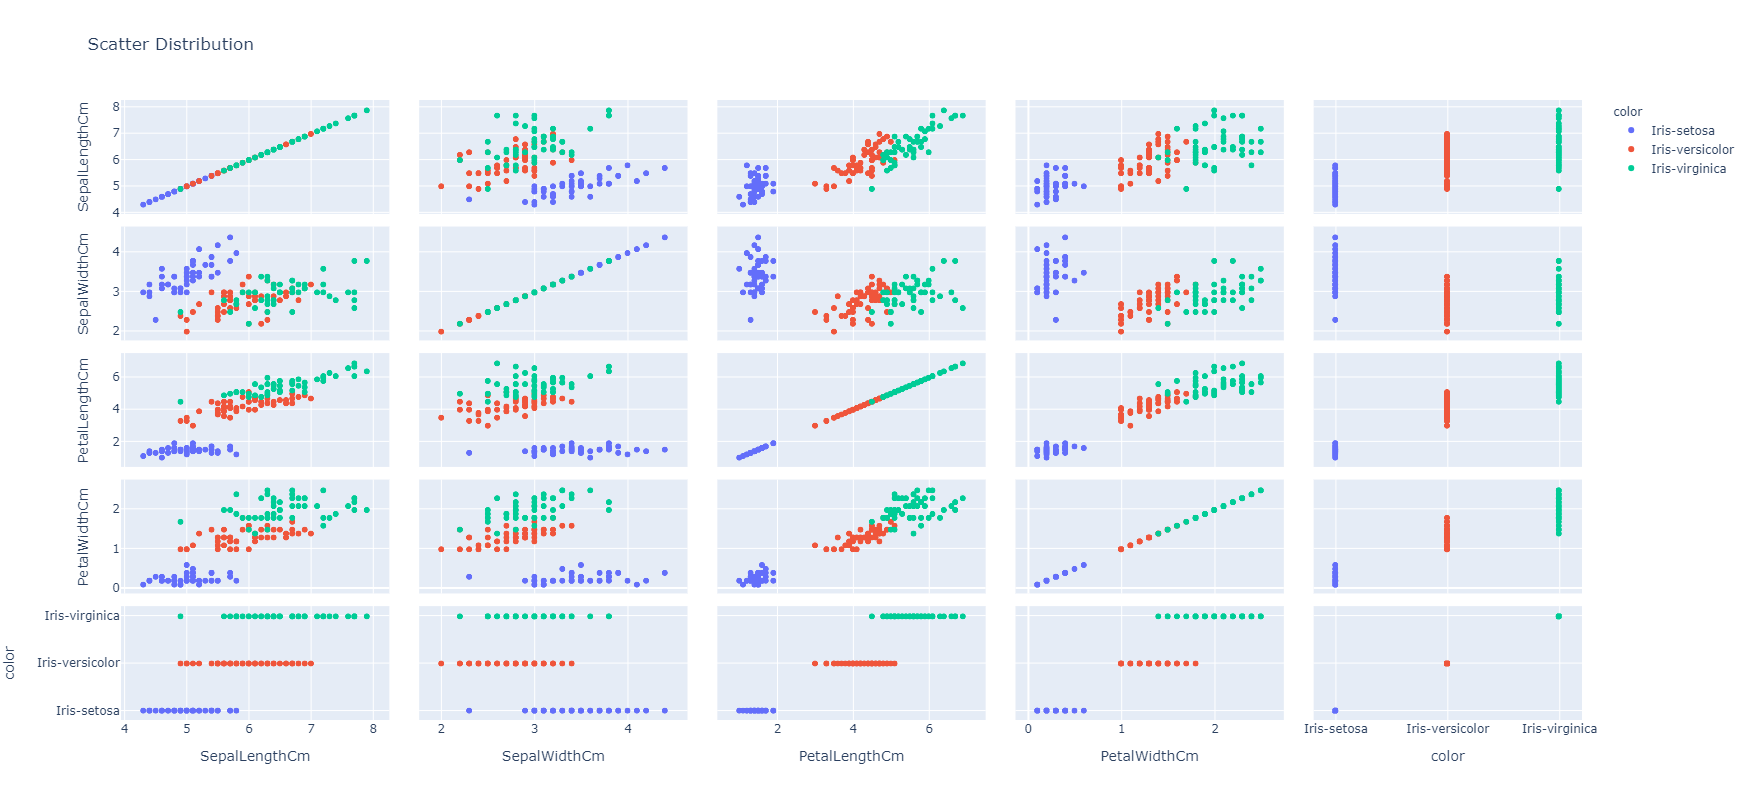

In [33]:
# let's plot the scatter matrix for all the features (Original)

fig= px.scatter_matrix(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], color= df['Species'], title= 'Scatter Distribution')
fig.update_layout(height= 800)
fig.show()

<font color = 'Orange'><h2> Inferences: </h2></font> 


- From both the methods of clustering we can conclude that number of optimal clusters are 3.